# Linear regression

### Let's define the function!

\\( y = ax + b \\)

<IPython.core.display.Javascript object>


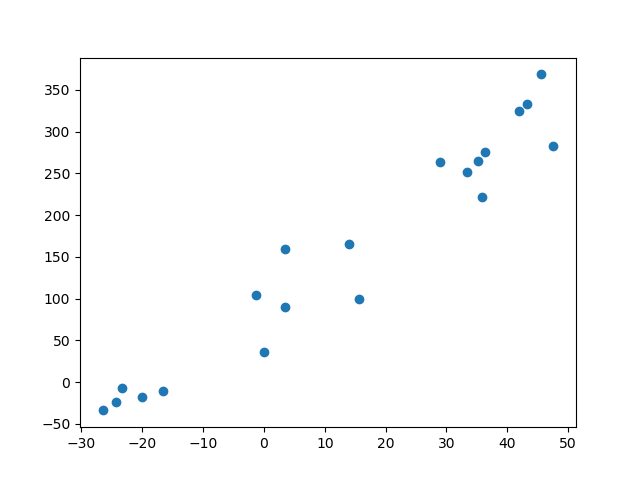

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Noise mean and standart deviation
mu, sigma = 0, 40

# Range of input values
range_min = -50
range_max = 50

# Number of examples to use for training
samples = 20

# The "ground-truth" function
slope = 5
bias = 100
f = lambda slope, bias, x: slope*x + bias

# Input values
x = np.random.uniform(range_min, range_max, samples)

# Output values with added noise
y = f(slope, bias, x) + np.random.normal(mu, sigma, samples)

#for in_out in zip(x, y):
#    print("X :{0:.2f} \tY:{1:.2f}".format(in_out[0], in_out[1]))

fig1, ax1 = plt.subplots()
ax1.scatter(x,y)
fig1.show()

---------------------------------------------------------------------------------

### Define the single-neuron network without non-linerity

In [9]:
import keras
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(1,))
preds = Dense(1,activation='relu')(inputs)
model = Model(inputs=inputs,outputs=preds)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


---------------------------------------------------------------------------------

### Set training settings and callbacks

In [10]:
# Print the batch number at the beginning of every batch.
weight_log = []
weight_log_callback = keras.callbacks.LambdaCallback(on_epoch_end=lambda batch,logs: weight_log.append([model.layers[1].get_weights()[0][0][0], model.layers[1].get_weights()[1][0]]))

# Define optimization algorithm
sgd = keras.optimizers.SGD(lr=0.0000001)
adam = keras.optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
model.compile(optimizer=adam ,loss='mse')

---------------------------------------------------------------------------------

### Start training

In [12]:
# Start training
model.fit(x,y, batch_size=1, epochs=100, shuffle=False, callbacks=[weight_log_callback])

Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 1373.0953
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1367.6576
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1362.3233
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1357.0903
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1351.9571
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 1346.9231
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 1341.9859
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 1337.1446
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 1332.3982
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 1327.7444
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 1323.1823
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 1318.7105
E

20/20 [==============================] - 0s 2ms/step - loss: 1147.9284
Epoch 99/100
20/20 [==============================] - 0s 2ms/step - loss: 1147.3453
Epoch 100/100
20/20 [==============================] - 0s 2ms/step - loss: 1146.7778


-----------------------------------------------------------------------------------------------------------------------------

### Animate training 

<IPython.core.display.Javascript object>


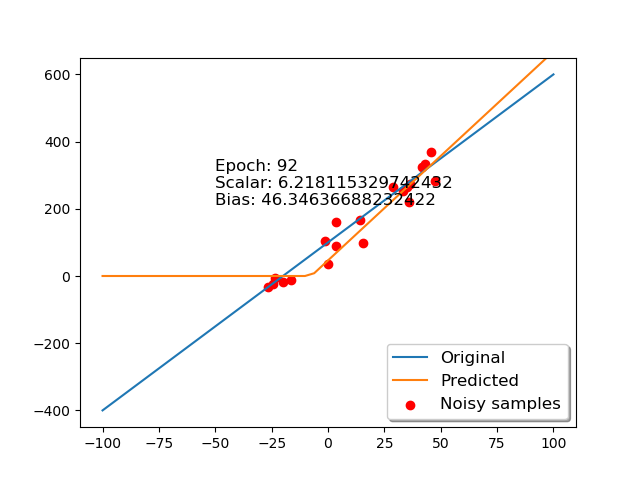

In [13]:
test_input = np.linspace(range_min*2, range_max*2)
weights = model.layers[1].get_weights()
tmp_model = model

import matplotlib.animation

fig2, ax2 = plt.subplots()
ax2.scatter(x,y, c='r', label='Noisy samples')
ax2.plot(test_input, f(slope, bias, test_input), label='Original')
data, = ax2.plot([], [], label='Predicted')
text = ax2.text(range_min, f(slope, bias, range_max)-140, '', fontsize='large')
ax2.legend(loc='lower right', shadow=True, fontsize='large')

def animate(frame, data, weight_log, text):
    weights[0][0] = weight_log[frame][0]
    weights[1][0] = weight_log[frame][1]
    tmp_model.layers[1].set_weights(weights)
    data.set_data(test_input, tmp_model.predict(test_input))
    text.set_text("Epoch: {}\nScalar: {}\nBias: {}".format(frame, weight_log[frame][0], weight_log[frame][1]))
    return data, text,
    
ani = matplotlib.animation.FuncAnimation(fig2, animate, frames=len(weight_log), fargs=(data, weight_log, text), interval=100, repeat=True, blit=True)
fig2.show()

-----------------------------------------------------------------------------------------------------------------------------

### Plot slope and bias during training

<IPython.core.display.Javascript object>


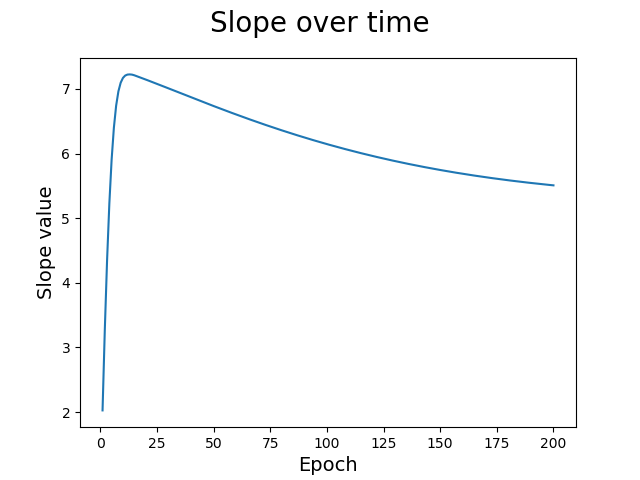

<IPython.core.display.Javascript object>


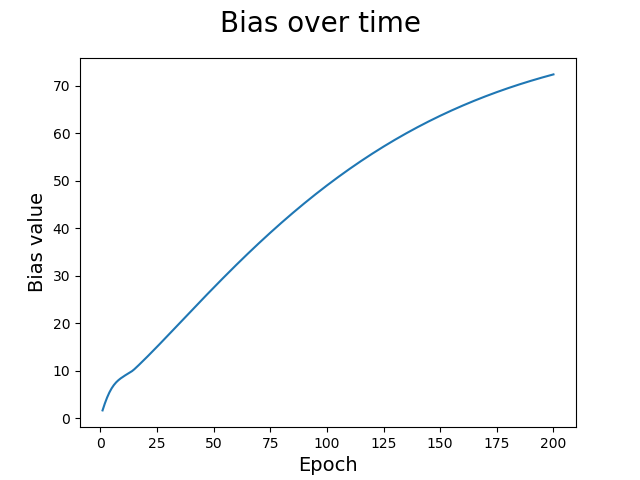

In [14]:
fig3, ax3 = plt.subplots()
a = np.array(weight_log)
epochs = a.shape[0]
ax3.plot(np.linspace(1,epochs,epochs), a[:,0])
fig3.suptitle('Slope over time', fontsize=20)
ax3.set_xlabel('Epoch', fontsize=14)
ax3.set_ylabel('Slope value', fontsize=14)
fig3.show()

fig4, ax4 = plt.subplots()
a = np.array(weight_log)
epochs = a.shape[0]
ax4.plot(np.linspace(1,epochs,epochs), a[:,1])
fig4.suptitle('Bias over time', fontsize=20)
ax4.set_xlabel('Epoch', fontsize=14)
ax4.set_ylabel('Bias value', fontsize=14)
fig4.show()

-----------------------------------------------------------------------------------------------------------------------------

### Calculate and visualize cost function for given function

<IPython.core.display.Javascript object>


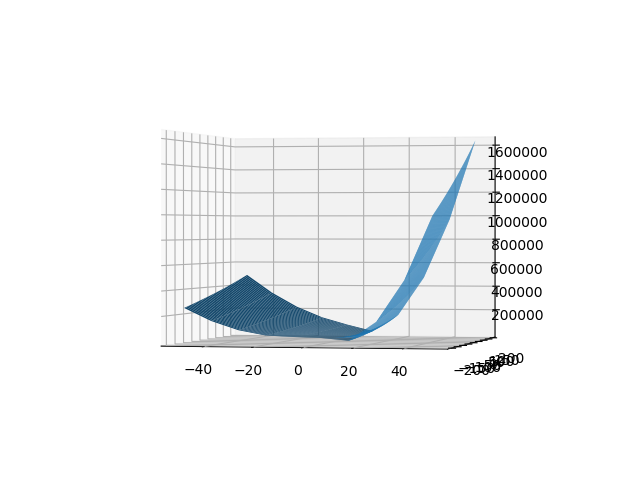

In [15]:
from sklearn.metrics import mean_squared_error

slope_points = 10
bias_points = 40
loss = np.zeros((bias_points, slope_points), dtype='float32')
s = np.linspace(-50, 50, slope_points)
b = np.linspace(-200, 200, bias_points)
for i, sl in enumerate(s):
    for j, bs in enumerate(b):
        weights[0][0] = sl
        weights[1][0] = bs
        tmp_model.layers[1].set_weights(weights)
        loss[j,i] = mean_squared_error(y, tmp_model.predict(x))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

S, B = np.meshgrid(s, b)
ax.plot_surface(S, B, loss)

plt.show()